## Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency, iqr
import stat

In [4]:
# import dataset
car_df= pd.read_csv("car.csv")

In [5]:
car_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
car_df.shape

(11914, 16)

In [7]:
car_df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [8]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [10]:
#checking missing data
car_df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

### Treating Missing data

### Mode Imputation

For categorical variables

In [12]:
# identify features with missing data
feature_with_missing_values = ['Engine Fuel Type','Market Category']

# replace missing values with the mode for each feature

for feature in feature_with_missing_values:
    mode = car_df[feature].mode()[0]
    car_df[feature].fillna(mode,inplace=True)
    

### Mean Imputation

for continuous variables

In [16]:
#dentitfy features with missing values
features_with_NA = ['Engine HP','Engine Cylinders','Number of Doors']

# replace missing values with the mead for each feature
for i in features_with_NA:
    mean = car_df[i].mean()
    car_df[i].fillna(mean,inplace=True)

In [17]:
# Check missing values again

car_df.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

### Descriptive Statistics

In [33]:
car_df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Price
count,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.386070,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,108.875192,1.778316,0.881093,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [32]:
car_df.rename(columns={'MSRP':'Price'},inplace=True)

In [26]:
# Count values in the categorical columns

for i in car_df:
    if car_df[i].dtypes in ['object']:
        print(car_df[i].value_counts())
        print('*****************************************')

Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Spyker    

In [28]:
# Create the list of categorical type variables

category = []

for i in car_df:
    if car_df[i].dtypes in ['object']:
        category.append(i)

In [29]:
category

['Make',
 'Model',
 'Engine Fuel Type',
 'Transmission Type',
 'Driven_Wheels',
 'Market Category',
 'Vehicle Size',
 'Vehicle Style']

In [30]:
car_df.loc[:,category]

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style
0,BMW,1 Series M,premium unleaded (required),MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe
1,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible
2,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe
3,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe
4,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Luxury,Compact,Convertible
...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback
11910,Acura,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback
11911,Acura,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback
11912,Acura,ZDX,premium unleaded (recommended),AUTOMATIC,all wheel drive,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback


### Statistical Testing using Chisquare:

To check whether a feature is predictor of the price of car or not

In [31]:

import colorama
from colorama import Fore

Make:


<IPython.core.display.Javascript object>

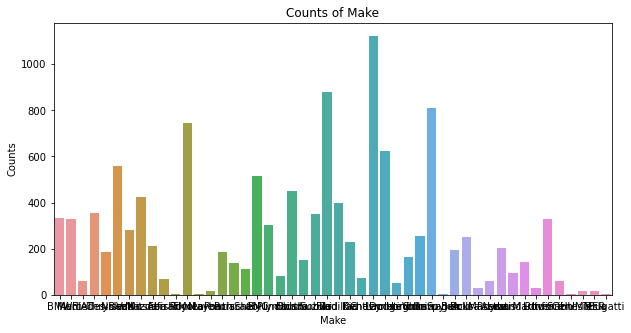

'Make'is a  Good Predictor
p_val=0.0

Model:


<IPython.core.display.Javascript object>

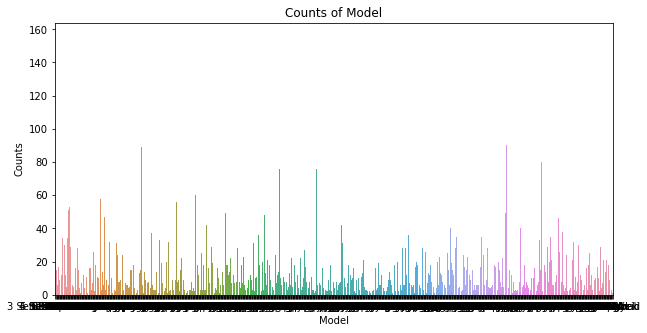

'Model'is a  Good Predictor
p_val=0.0

Engine Fuel Type:


<IPython.core.display.Javascript object>

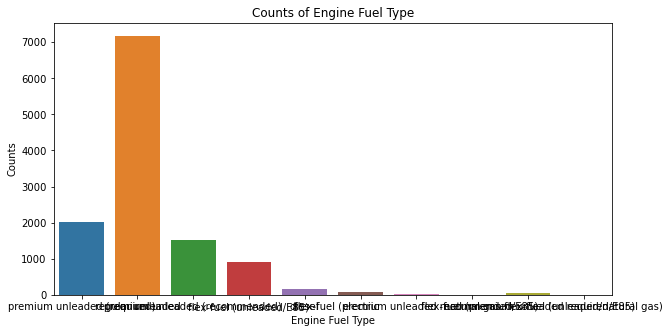

'Engine Fuel Type'is a  Good Predictor
p_val=0.0

Transmission Type:


<IPython.core.display.Javascript object>

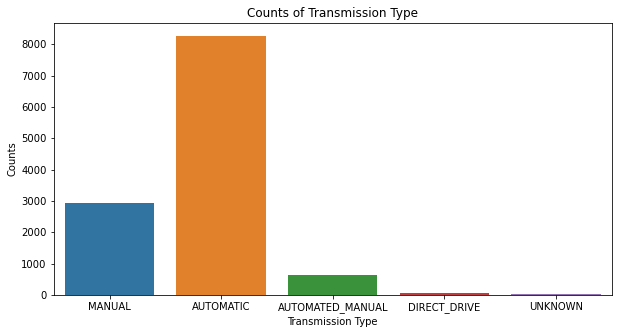

'Transmission Type'is a  Good Predictor
p_val=4.613148654179475e-30

Driven_Wheels:


<IPython.core.display.Javascript object>

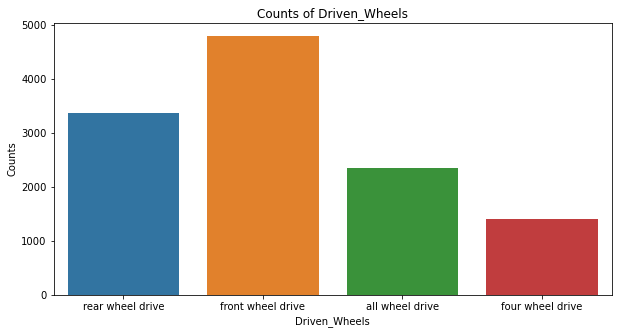

'Driven_Wheels'is a  Good Predictor
p_val=4.6722484928026013e-150

Market Category:


<IPython.core.display.Javascript object>

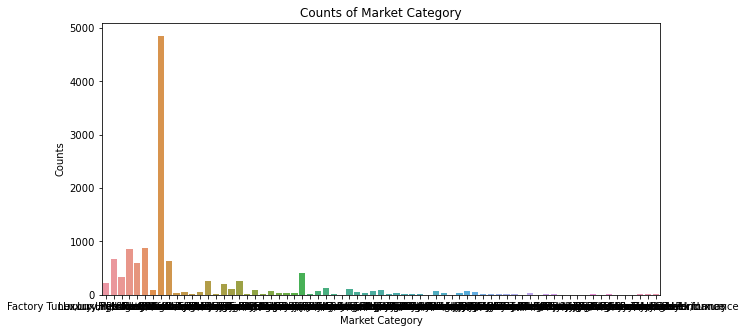

'Market Category'is a  Good Predictor
p_val=0.0

Vehicle Size:


<IPython.core.display.Javascript object>

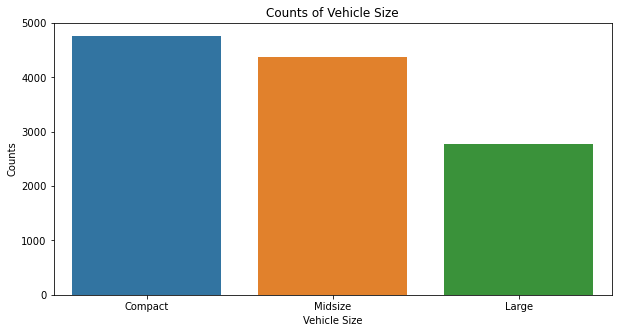

'Vehicle Size'is a  Good Predictor
p_val=2.118276010802214e-97

Vehicle Style:


<IPython.core.display.Javascript object>

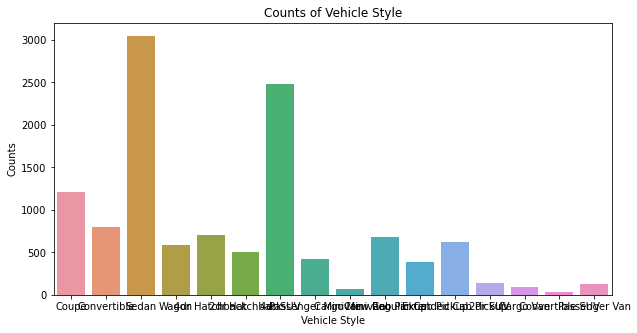

'Vehicle Style'is a  Good Predictor
p_val=2.434657990567585e-96



In [38]:
# Lets plot category variables count

for i in category:
    print(i+":")
    plt.figure(figsize=(10,5))
    sns.countplot(x=i,data=car_df)
    plt.xlabel(i)
    plt.ylabel('Counts')
    plt.title('Counts of '+i)
    plt.show()
    
    a = np.array(pd.crosstab(car_df.Price,car_df[i]))
    (stats,p,dof,_) = chi2_contingency(a,correction=False)
    
    if p>0.05:
        print(Fore.RED + "'{}'is a bad Predictor".format(i))
        print('p_val={}\n'.format(p))
        
    else:
        print(Fore.GREEN + "'{}'is a  Good Predictor".format(i))
        print('p_val={}\n'.format(p))

All the categorical variables are good predictors of the car price

### Continuous variable

In [39]:
columns_name = car_df.columns.tolist()

continuous = list(set(columns_name)-set(category))

In [40]:
continuous

['city mpg',
 'Popularity',
 'highway MPG',
 'Number of Doors',
 'Engine Cylinders',
 'Price',
 'Engine HP',
 'Year']

In [43]:
car_df.loc[:,continuous]

,city mpg,Popularity,highway MPG,Number of Doors,Engine Cylinders,Price,Engine HP,Year
0,19,3916,26,2.0,6.0,46135,335.0,2011
1,19,3916,28,2.0,6.0,40650,300.0,2011
2,20,3916,28,2.0,6.0,36350,300.0,2011
3,18,3916,28,2.0,6.0,29450,230.0,2011
4,18,3916,28,2.0,6.0,34500,230.0,2011
...,...,...,...,...,...,...,...,...
11909,16,204,23,4.0,6.0,46120,300.0,2012
11910,16,204,23,4.0,6.0,56670,300.0,2012
11911,16,204,23,4.0,6.0,50620,300.0,2012
11912,16,204,23,4.0,6.0,50920,300.0,2013


city mpg:


<IPython.core.display.Javascript object>

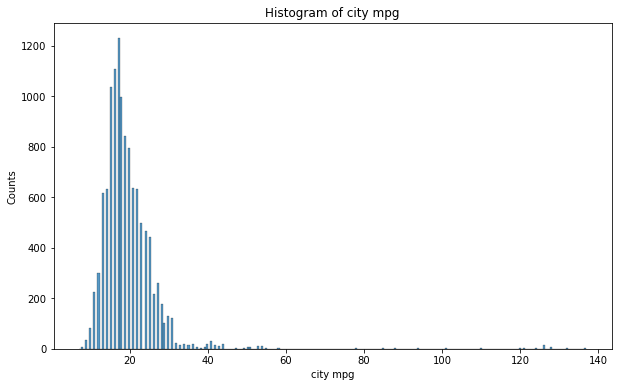

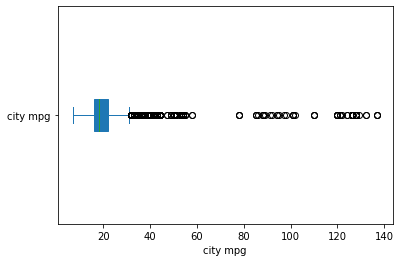

Popularity:


<IPython.core.display.Javascript object>

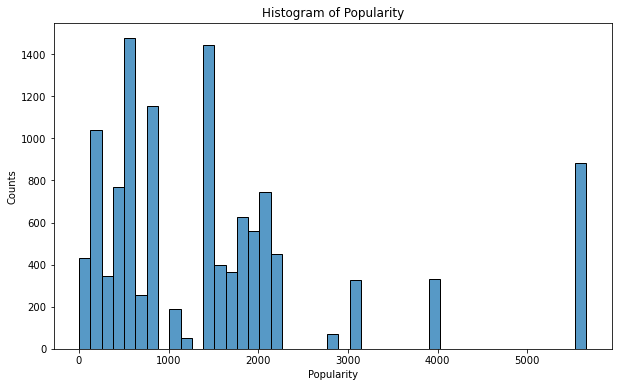

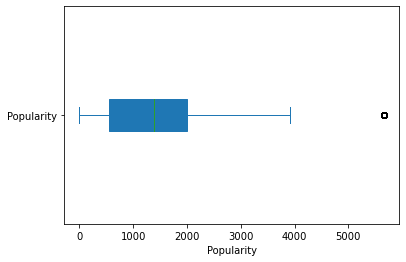

highway MPG:


<IPython.core.display.Javascript object>

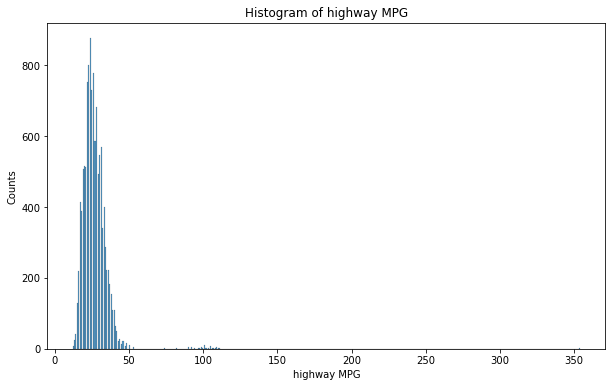

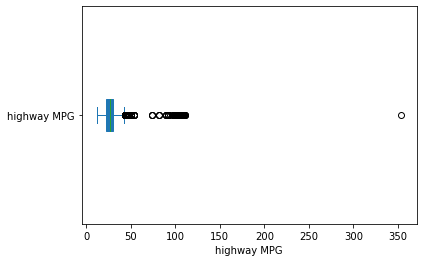

Number of Doors:


<IPython.core.display.Javascript object>

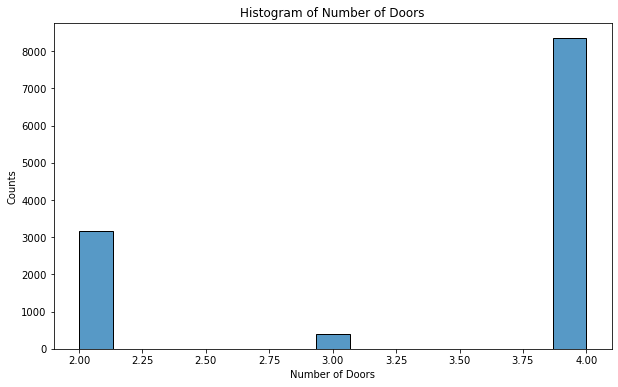

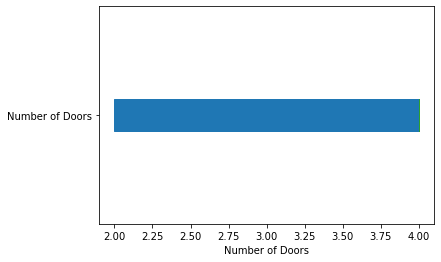

Engine Cylinders:


<IPython.core.display.Javascript object>

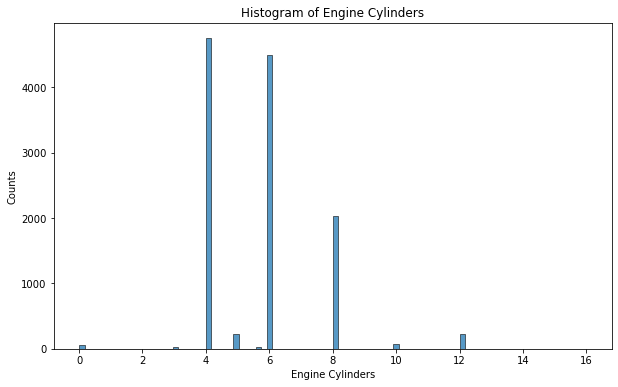

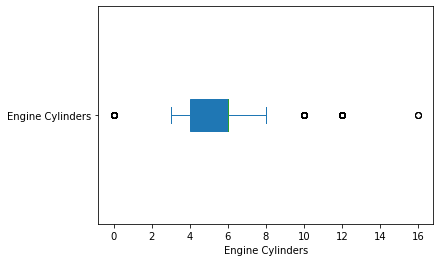

Price:


<IPython.core.display.Javascript object>

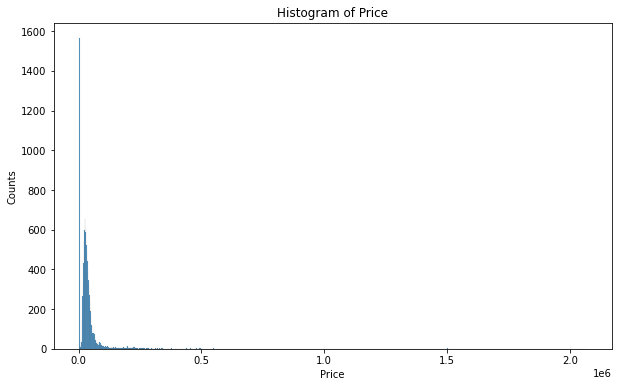

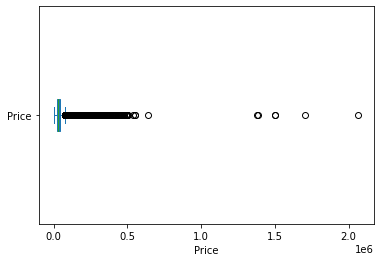

Engine HP:


<IPython.core.display.Javascript object>

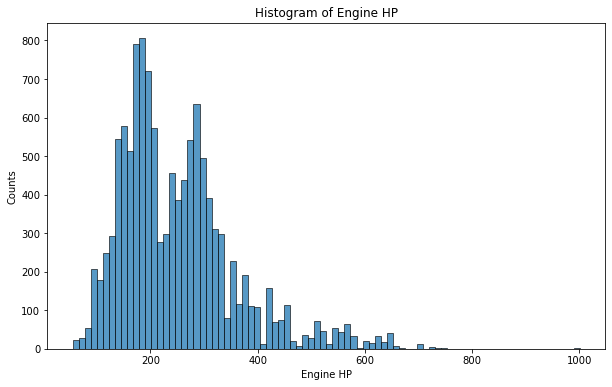

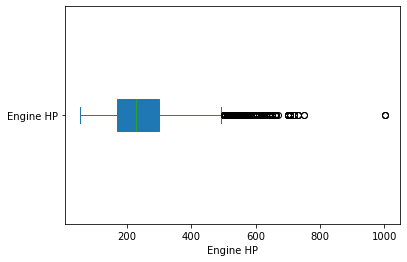

Year:


<IPython.core.display.Javascript object>

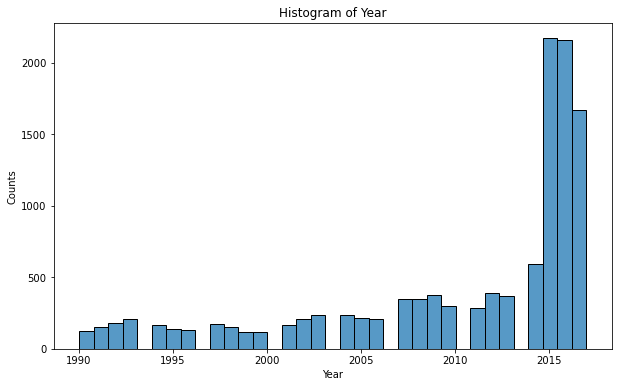

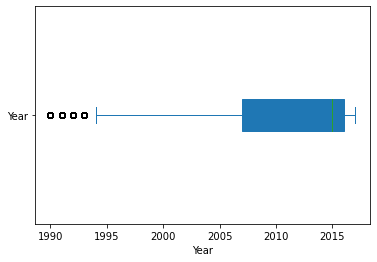

In [45]:
# Visualize the continuous variables

for i in continuous:
    print(i+":")
    plt.figure(figsize=(10,6))
    sns.histplot(car_df[i])
    plt.xlabel(i)
    plt.ylabel('Counts')
    plt.title('Histogram of '+i)
    plt.show()
    car_df[i].plot.box(vert=False,patch_artist=True)
    plt.xlabel(i)
    plt.show()

### Treating Outliers 

In [46]:
iqr=iqr # inter quartile range

city mpg:


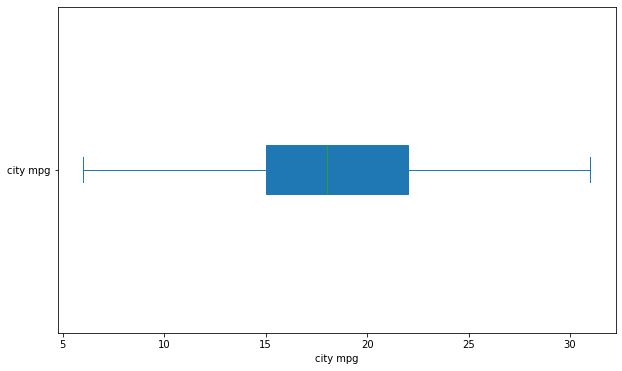

Left Limit:4.5
Right Limit:32.5
iqr:7.0
if left outlier type 'left' else 'right' else 'both' if no outliers then type:no


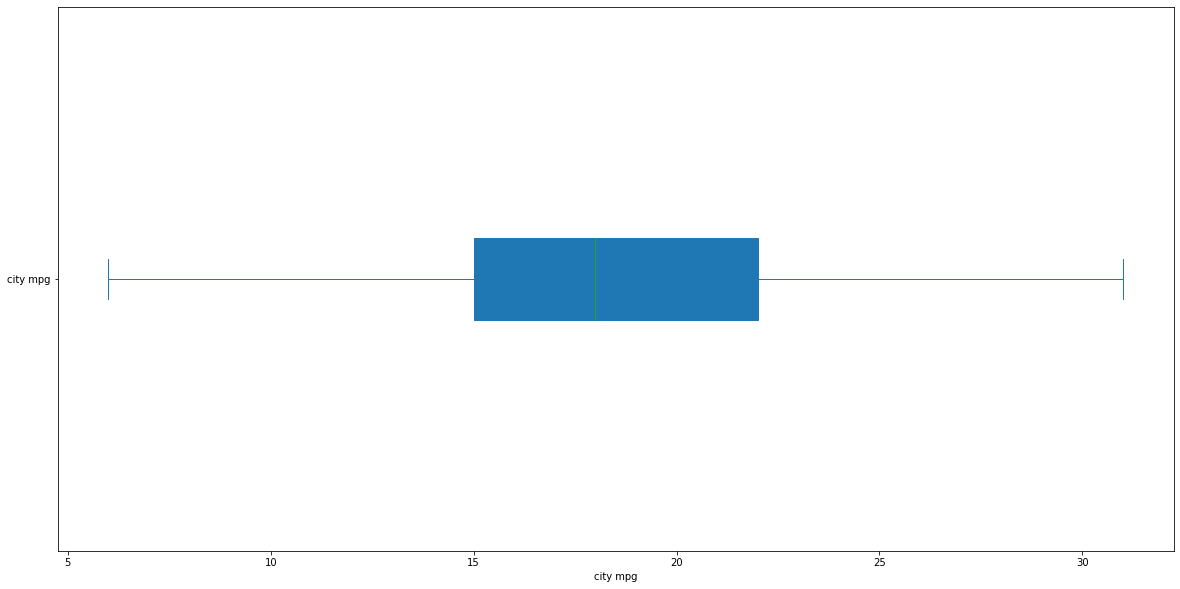

Popularity:


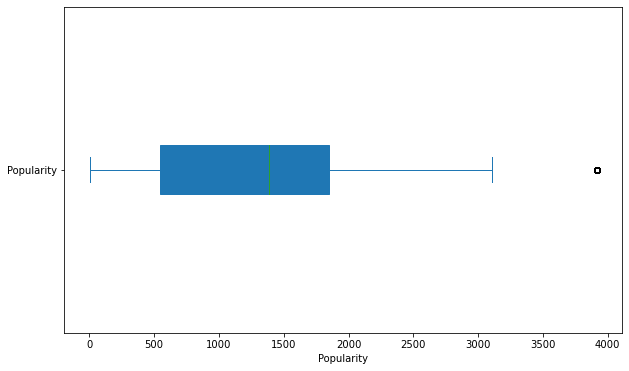

Left Limit:-1404.0
Right Limit:3804.0
iqr:1302.0
if left outlier type 'left' else 'right' else 'both' if no outliers then type:right
by what number do you want to replace1302


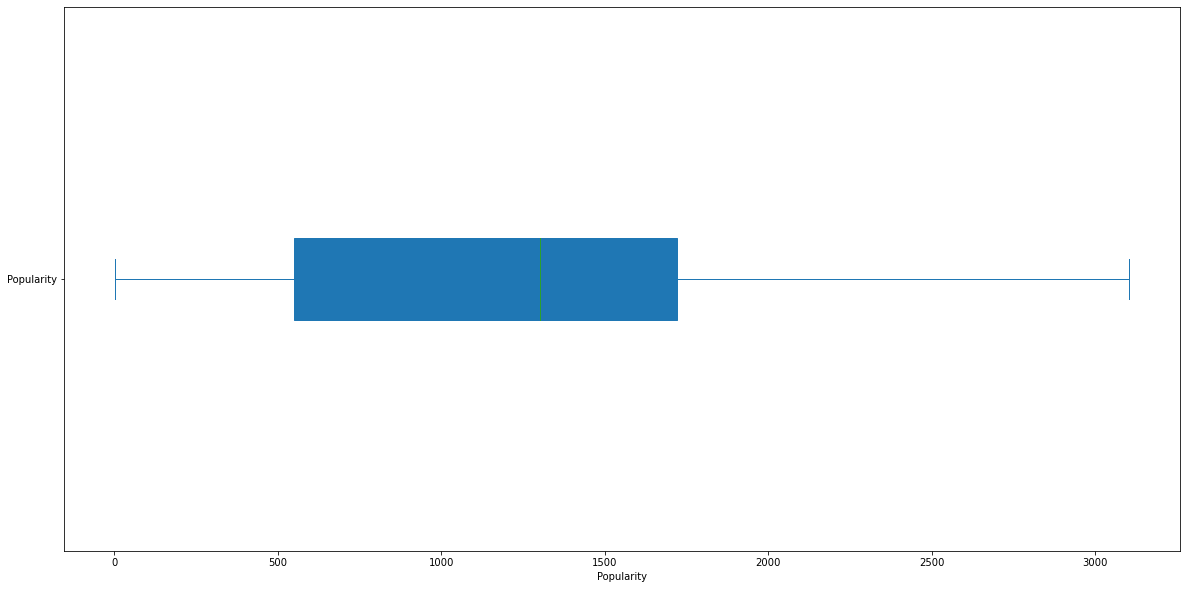

highway MPG:


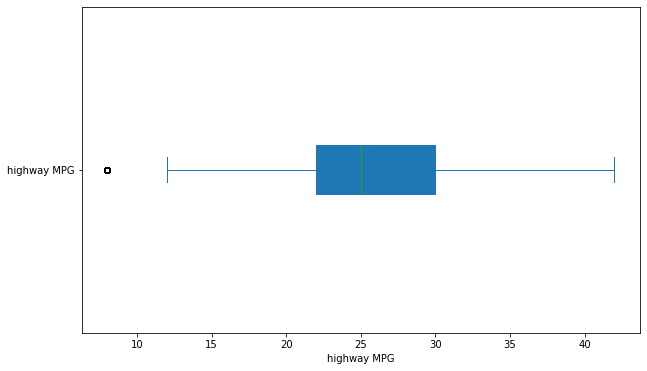

Left Limit:10.0
Right Limit:42.0
iqr:8.0
if left outlier type 'left' else 'right' else 'both' if no outliers then type:left
by what number do you want to replace8


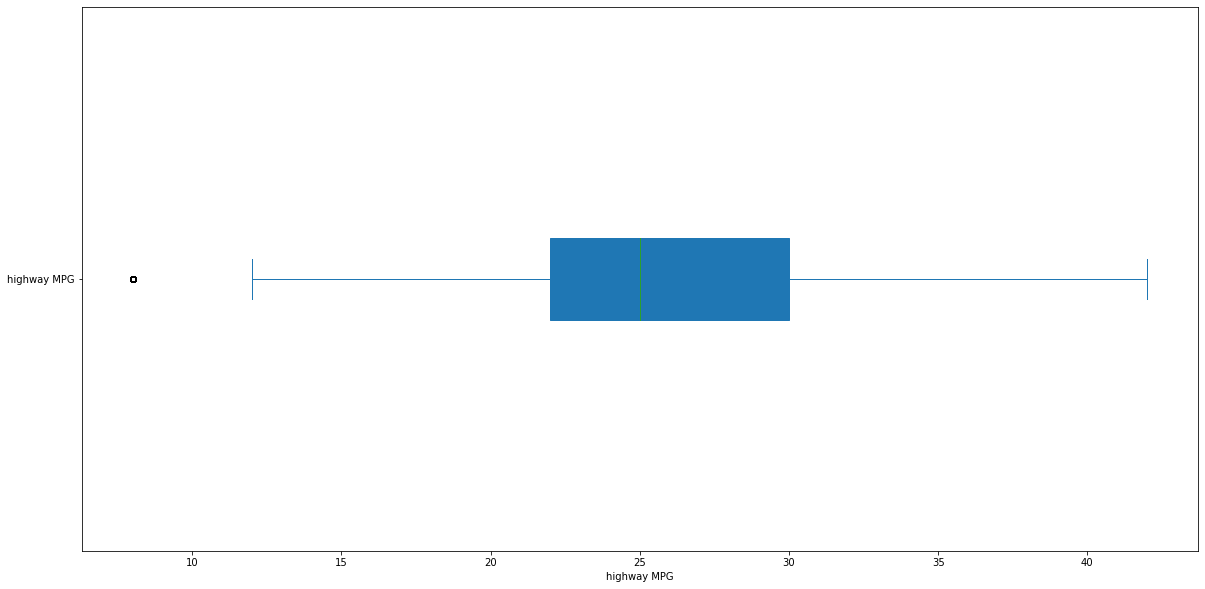

Number of Doors:


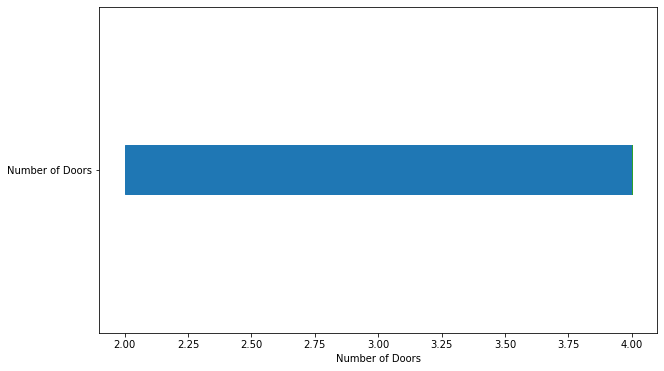

Left Limit:-1.0
Right Limit:7.0
iqr:2.0
if left outlier type 'left' else 'right' else 'both' if no outliers then type:no


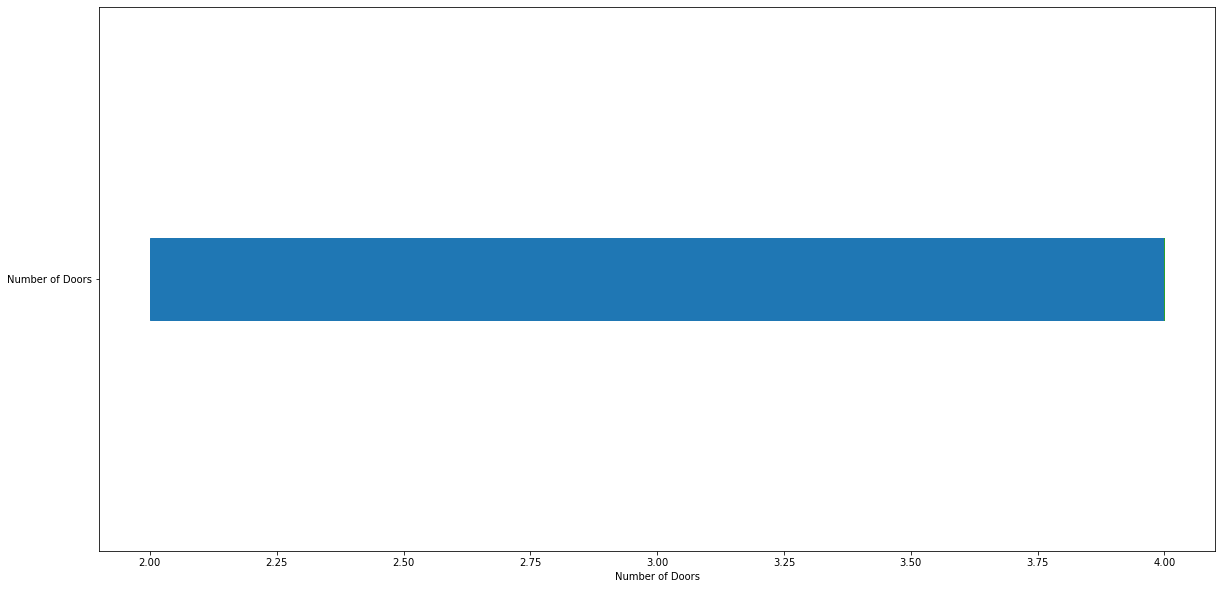

Engine Cylinders:


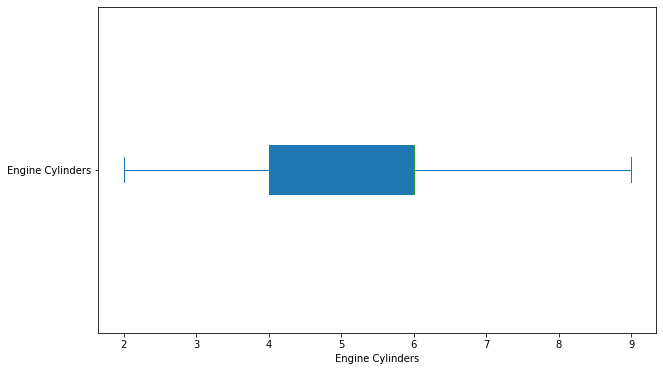

Left Limit:1.0
Right Limit:9.0
iqr:2.0
if left outlier type 'left' else 'right' else 'both' if no outliers then type:no


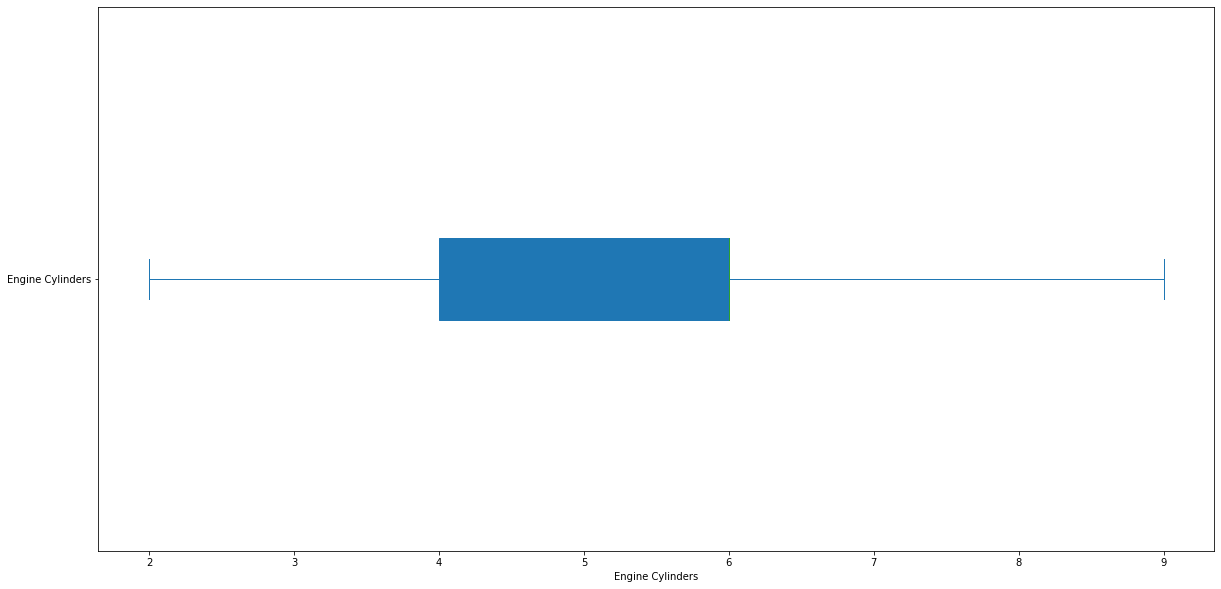

Price:


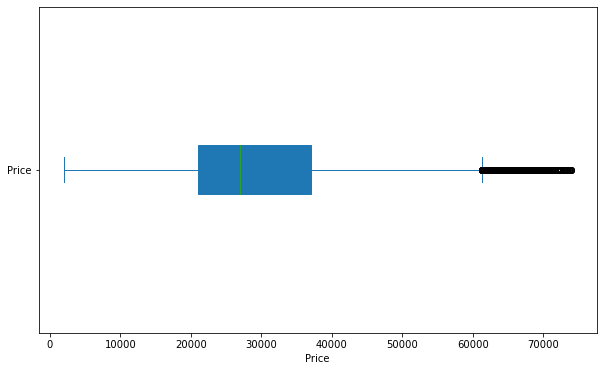

Left Limit:-3155.625
Right Limit:61259.375
iqr:16103.75
if left outlier type 'left' else 'right' else 'both' if no outliers then type:right
by what number do you want to replace16103


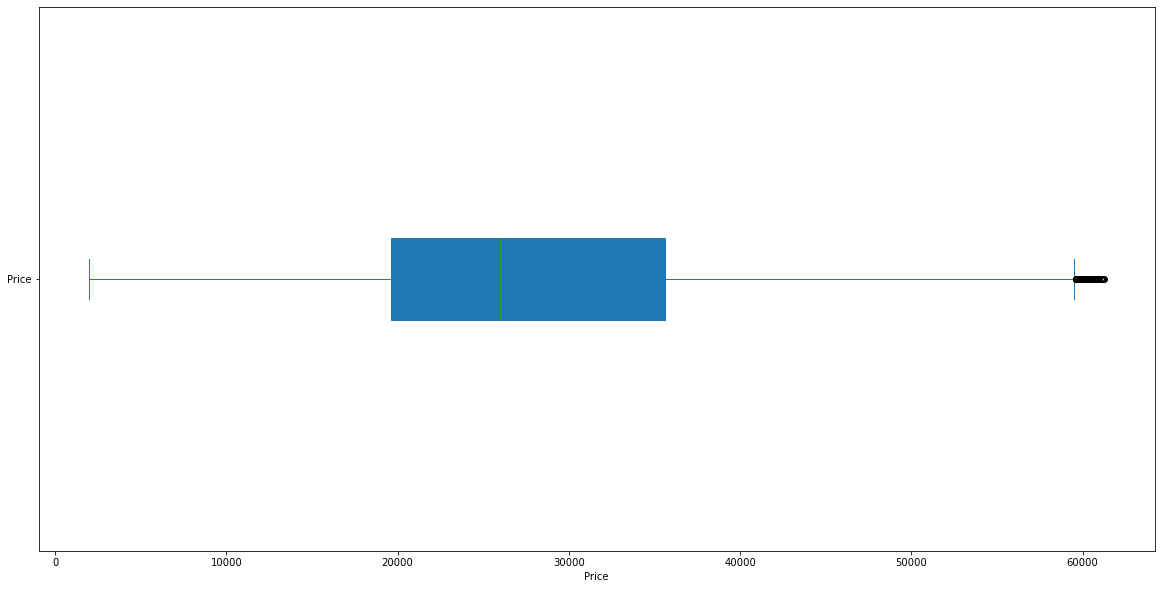

Engine HP:


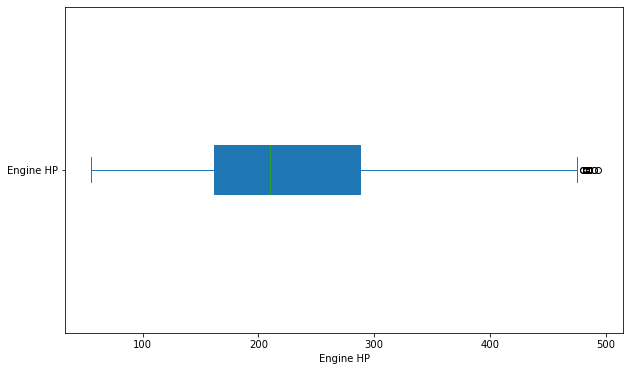

Left Limit:-27.0
Right Limit:477.0
iqr:126.0
if left outlier type 'left' else 'right' else 'both' if no outliers then type:right
by what number do you want to replace126


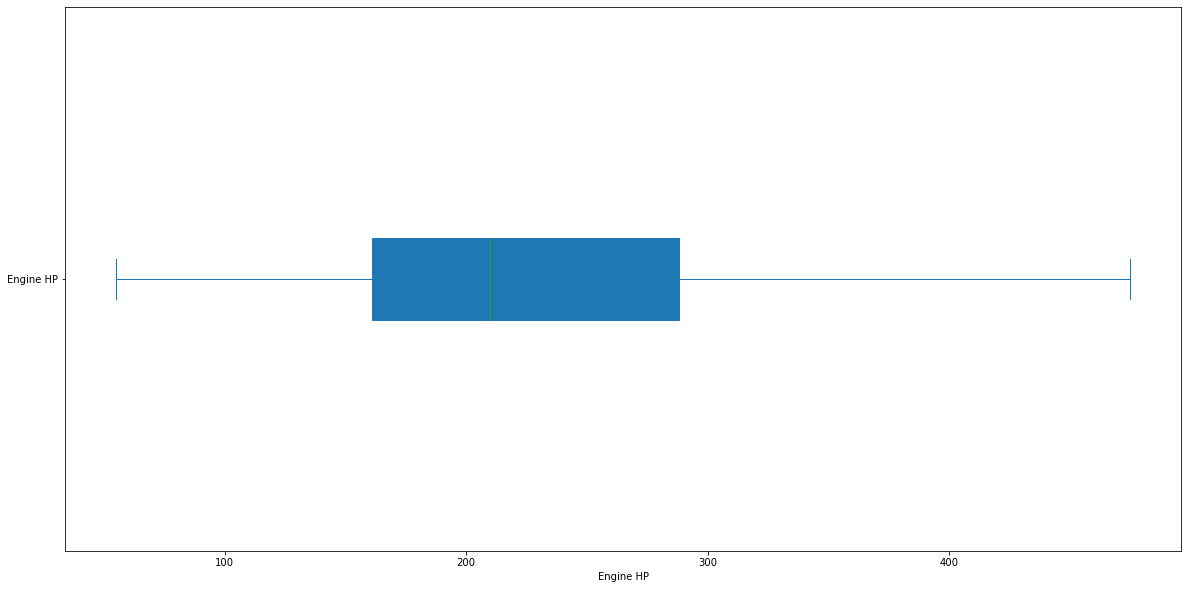

Year:


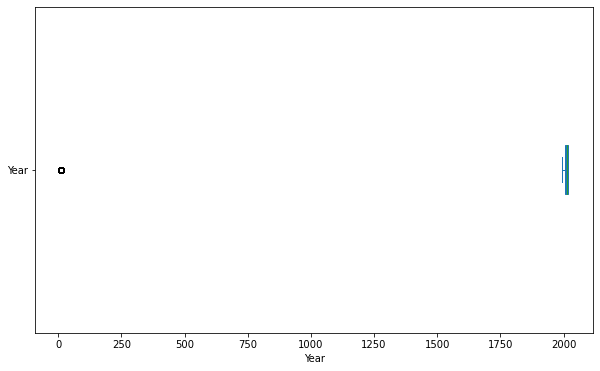

Left Limit:1993.5
Right Limit:2029.5
iqr:9.0
if left outlier type 'left' else 'right' else 'both' if no outliers then type:no


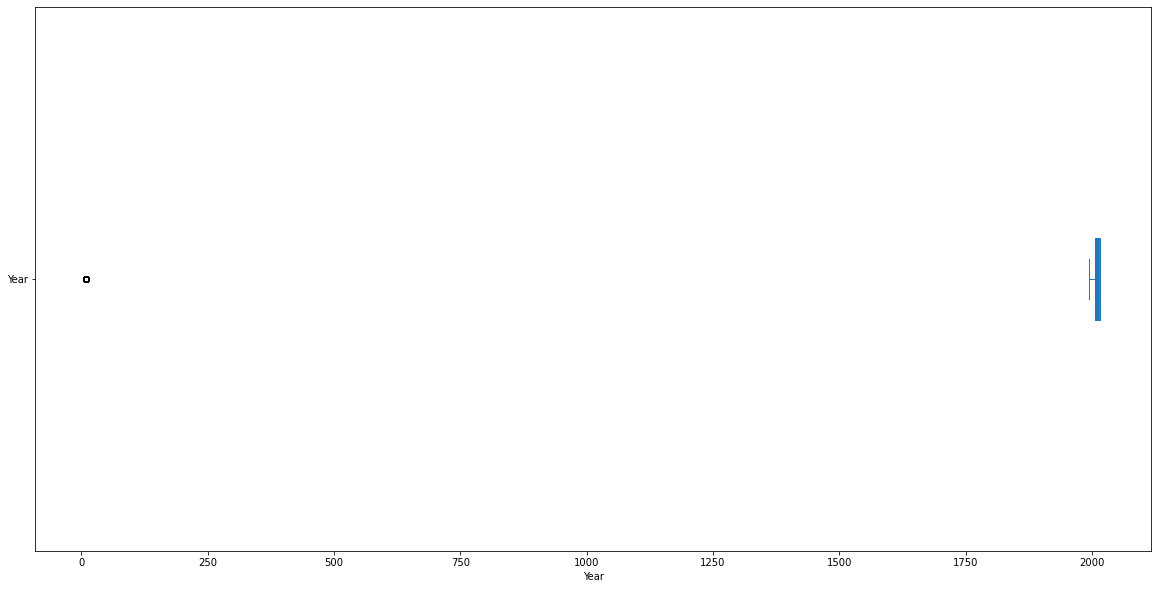

In [52]:
for i in continuous:
    print(i+":")
    plt.figure(figsize=(10,6))
    car_df[i].plot.box(vert=False,patch_artist=True)
    plt.xlabel(i)
    plt.show()
    
    iqr = car_df[i].describe()['75%']-car_df[i].describe()['25%']
    right_lim = car_df[i].quantile(0.75)+1.5*iqr
    left_lim = car_df[i].quantile(0.25)-1.5*iqr
    print('Left Limit:{}'.format(left_lim))
    print('Right Limit:{}'.format(right_lim))
    print('iqr:{}'.format(iqr))
    
    a=input("if left outlier type 'left' else 'right' else 'both' if no outliers then type:" )
    a=a.lower()
    
    if a=='left':
        lo = float(input('by what number do you want to replace'))
        car_df[i]=[lo if val<left_lim else val for val in car_df[i]]
    elif a=='right':
        ro=float(input('by what number do you want to replace'))
        car_df[i]=[ro if val>right_lim else val for val in car_df[i]]
    elif a=='both':
        lo = float(input('by what number do you want to replace'))
        
        ro=float(input('by what number do you want to replace'))
        car_df[i]=[lo if val<left_lim else val for val in car_df[i]]
        car_df[i]=[ro if val>right_lim else val for val in car_df[i]]
        
    elif a =='no':
        pass
    plt.figure(figsize=(20,10))
    car_df[i].plot.box(vert=False, patch_artist=True)
    plt.xlabel(i)
    plt.show()

city mpg:


<IPython.core.display.Javascript object>

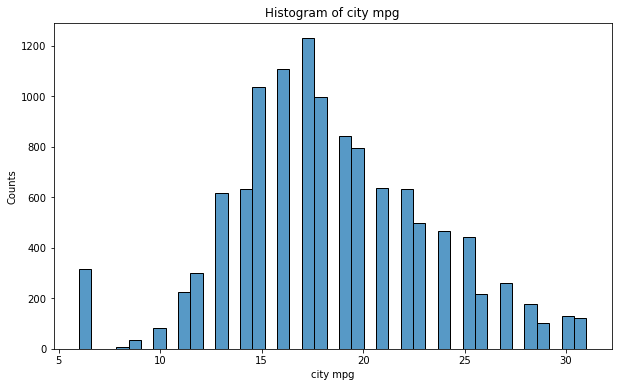

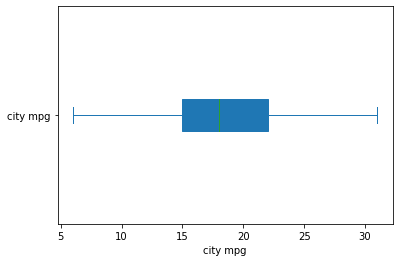

Popularity:


<IPython.core.display.Javascript object>

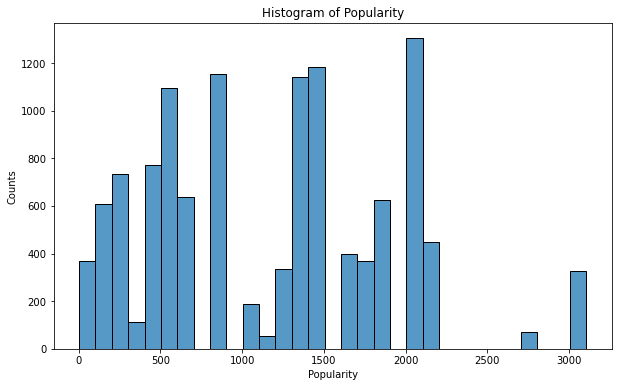

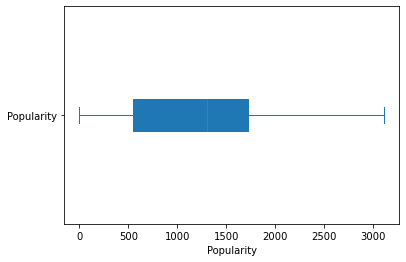

highway MPG:


<IPython.core.display.Javascript object>

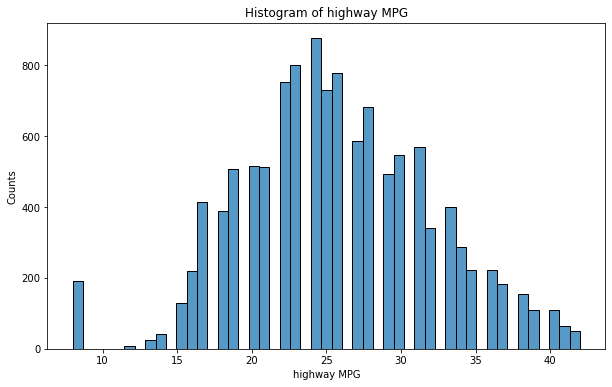

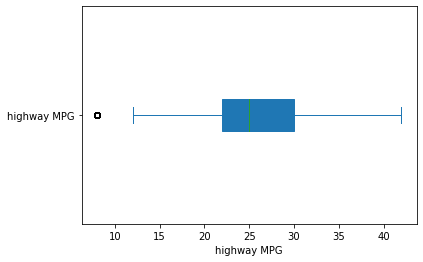

Number of Doors:


<IPython.core.display.Javascript object>

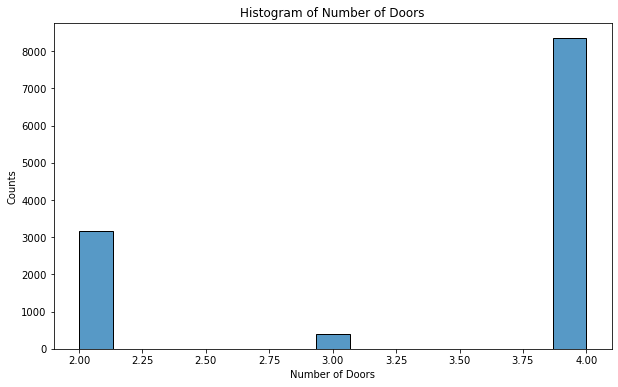

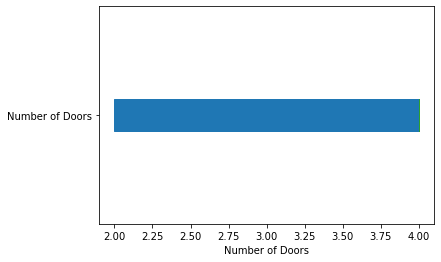

Engine Cylinders:


<IPython.core.display.Javascript object>

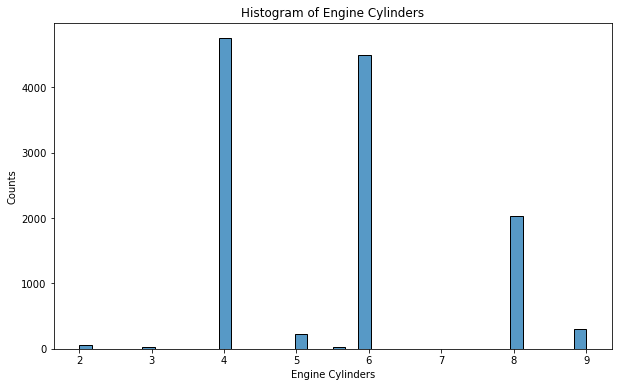

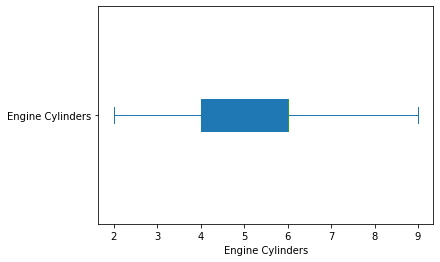

Price:


<IPython.core.display.Javascript object>

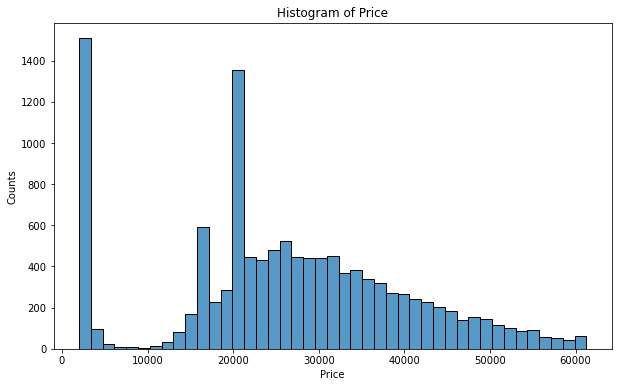

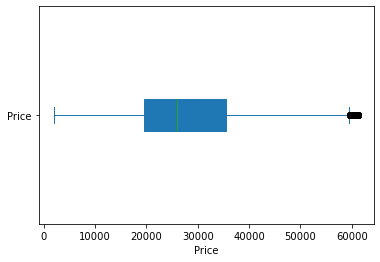

Engine HP:


<IPython.core.display.Javascript object>

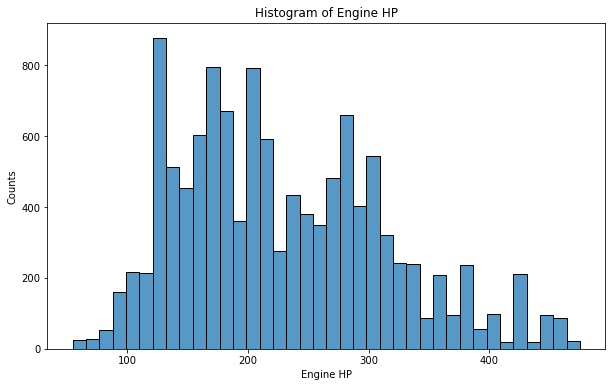

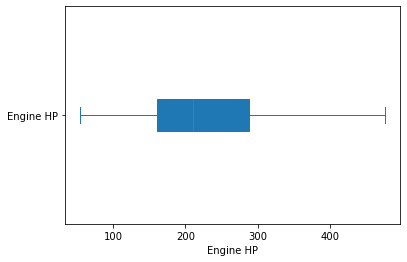

Year:


<IPython.core.display.Javascript object>

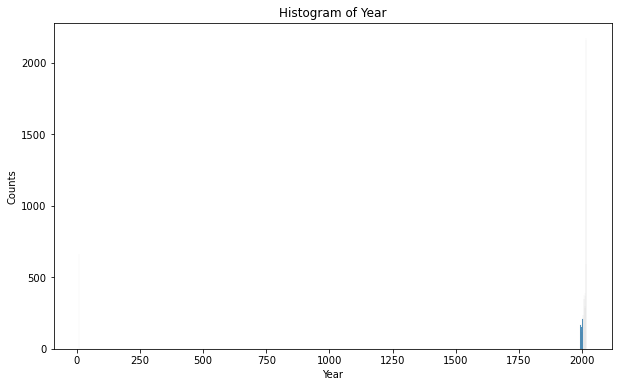

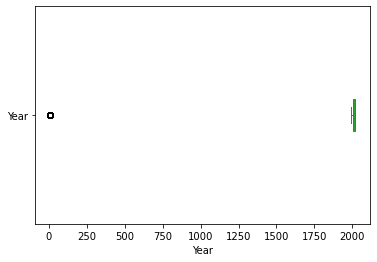

In [53]:
# visualize the continuous variables again after treating the outliers

for i in continuous:
    print(i+":")
    plt.figure(figsize=(10,6))
    sns.histplot(car_df[i])
    plt.xlabel(i)
    plt.ylabel('Counts')
    plt.title('Histogram of '+i)
    plt.show()
    car_df[i].plot.box(vert=False,patch_artist=True)
    plt.xlabel(i)
    plt.show()

### Statistical Testing Using Anova

In [54]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
import statsmodels.api as smf

In [61]:
for i in continuous:
    print(i+":")
    print('ANOVA:\n')
    mod = ols(i+'~Price',data=car_df).fit()
    aov_table = smf.stats.anova_lm(mod,type=2)
    print(aov_table,'\n')
    print('Pvalue={}\n'.format(aov_table['PR(>F)'][0]))
    p = aov_table['PR(>F)'][0]
    
    if p>0.05:
        print(Fore.RED + "'{}' is a bad predictor'\n".format(i))
        print("p_val={}\n".format(p))
        
    else:
        print("TUKEY:\n")
        #print(Fore.RED +"'{}'is a good predictor'\n".format(i))
        print(Fore.GREEN +"'{}' is a Good Predictor".format(i))
        print("p_val={}\n".format(p))
        tukey = pairwise_tukeyhsd(car_df[i],car_df['Price'],alpha=0.05)
        print(tukey,'\n')

city mpg:
ANOVA:



SyntaxError: invalid syntax (<unknown>, line 1)

In [64]:
import scipy.stats as stats

In [75]:
for i in continuous:
    
    corr_coef,p_val= stats.pearsonr(car_df[i],car_df['Price'])
    
    if p_val<0.05:
        if corr_coef>0:
            print('\nThe '+i+' is positively correlated with the Price')
            print('p_val={}\n'.format(p_val))
            print('corr_coef={}'.format(corr_coef))
        elif corr_coef<0:
            print('\nThe '+i+' is negatively correlated with the Price')
            print('p_val={}'.format(p_val))
            print('corr_coef={}'.format(corr_coef))
        else:      
            print('\nThe '+i+' is not correlated with the Price')
            print('p_val={}\n'.format(p_val))
            print('corr_coef={}'.format(corr_coef))
    else:
        print('\nThe correlation is not statistically correlated')
        



The city mpg is negatively correlated with the Price
p_val=0.04166393042532669

corr_coef=-0.01866123752310678

The Popularity is positively correlated with the Price
p_val=0.0004354996537634499

corr_coef=0.03222167303769119

The highway MPG is positively correlated with the Price
p_val=0.011359200361057517

corr_coef=0.023191440293903545

The Number of Doors is positively correlated with the Price
p_val=2.8602725198327814e-152

corr_coef=0.23738573889292766

The Engine Cylinders is positively correlated with the Price
p_val=1.2877387392606651e-41

corr_coef=0.123352434304152

The Price is positively correlated with the Price
p_val=0.0

corr_coef=1.0

The Engine HP is positively correlated with the Price
p_val=0.0

corr_coef=0.5040693815046678

The Year is positively correlated with the Price
p_val=0.0

corr_coef=0.43126931204612207
